# Data Analyst Professional Practical Exam Submission

In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
import seaborn as sns

In [2]:
# loading data

df = pd.read_csv(r"C:\Users\nico-\Downloads\product_sales_data.csv")

In [3]:
# checking null values 

df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [4]:
# checking week 

df.week.value_counts()

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

In [5]:
# checking sales method

df.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [6]:
# replacing errors with appropiate formatting

df.sales_method.replace(to_replace = {'email':'Email','em + call':'Email + Call'}, inplace=True)
df.sales_method.value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [7]:
# checking customer id

df.customer_id.nunique()

15000

In [8]:
# checking nb_sold

df.nb_sold.unique()

array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16], dtype=int64)

In [9]:
# checking years as customer

df.years_as_customer.value_counts().sort_index(ascending= False).iloc[:5]

63    1
47    1
39    3
38    2
37    2
Name: years_as_customer, dtype: int64

In [10]:
# removing the row with an incorrect value in years as customer

df = df[df.years_as_customer < 40]

## Data Validation:
There are 15000 rows and 8 columns in the dataset, after validation there are 14998 rows and 8 columns.
I will explain the cleaning and validation process on each of the columns:
- **Week**: There were no null values and the values ranged from 1 to 6 as expected.
- **Sales method**: There were no null values. There were 23 instances of "em + call" and 10 instances of "email" which have been replaced to the correct format and now the unique values are "Call", "Email" and "Email + Call" as required.
- **Customer id**: There were no null values, there were 15000 unique values as expected.
- **Nb sold**: There were no null values. Values ranged from 7 to 16.
- **Revenue**: There were 1074 null values. This represents more than 5% of the overall observations, once broken down in the different sales methods **Email** had 7% of null values, **Call** had 4% of null values and **Email + call** had 14% null values for this column. Initially I removed all observations with null values and had a look at how the revenue differed for each subgroup, after finding a clear difference between them I decided to use the mean revenue of each subgroup. After doing so there are no null values in this column.
- **Years as customer**: There were no null values, however there is one instance with 63 years and another with 47 years which would be impossible for a company founded on 1984 so I have decided to remove those 2 observations.
- **Nb site visits**: There were no null values.
- **State**: There were no null values, 50 unique values as expected.

In [11]:
# imputing null values in the revenue column with the mean of each method

means = df.groupby('sales_method').revenue.mean()

df.revenue = df.revenue.fillna(df.sales_method.map(means))

In [12]:
# annotations definition

def annotations(df,column):
    '''makes annotations on plots'''
    values = df[column].unique()
    for i, value in enumerate(['Email','Call','Email + Call']):
        result = len(df[df[column]==value])
        plt.annotate(result,(i-0.1,result))

## Exploratory Analysis

Before looking at the results of the analysis I will point out that I have no information on how many customers were approached by each method only on the ones that made purchases afterwards.

Unless all customers approached by either method bought products from the new line, it is impossible to measure the effectiveness of each approach in getting customers engaged with the new line of products, however there are some differences for each method based on the data that we do have and I will show them in the analysis below. 

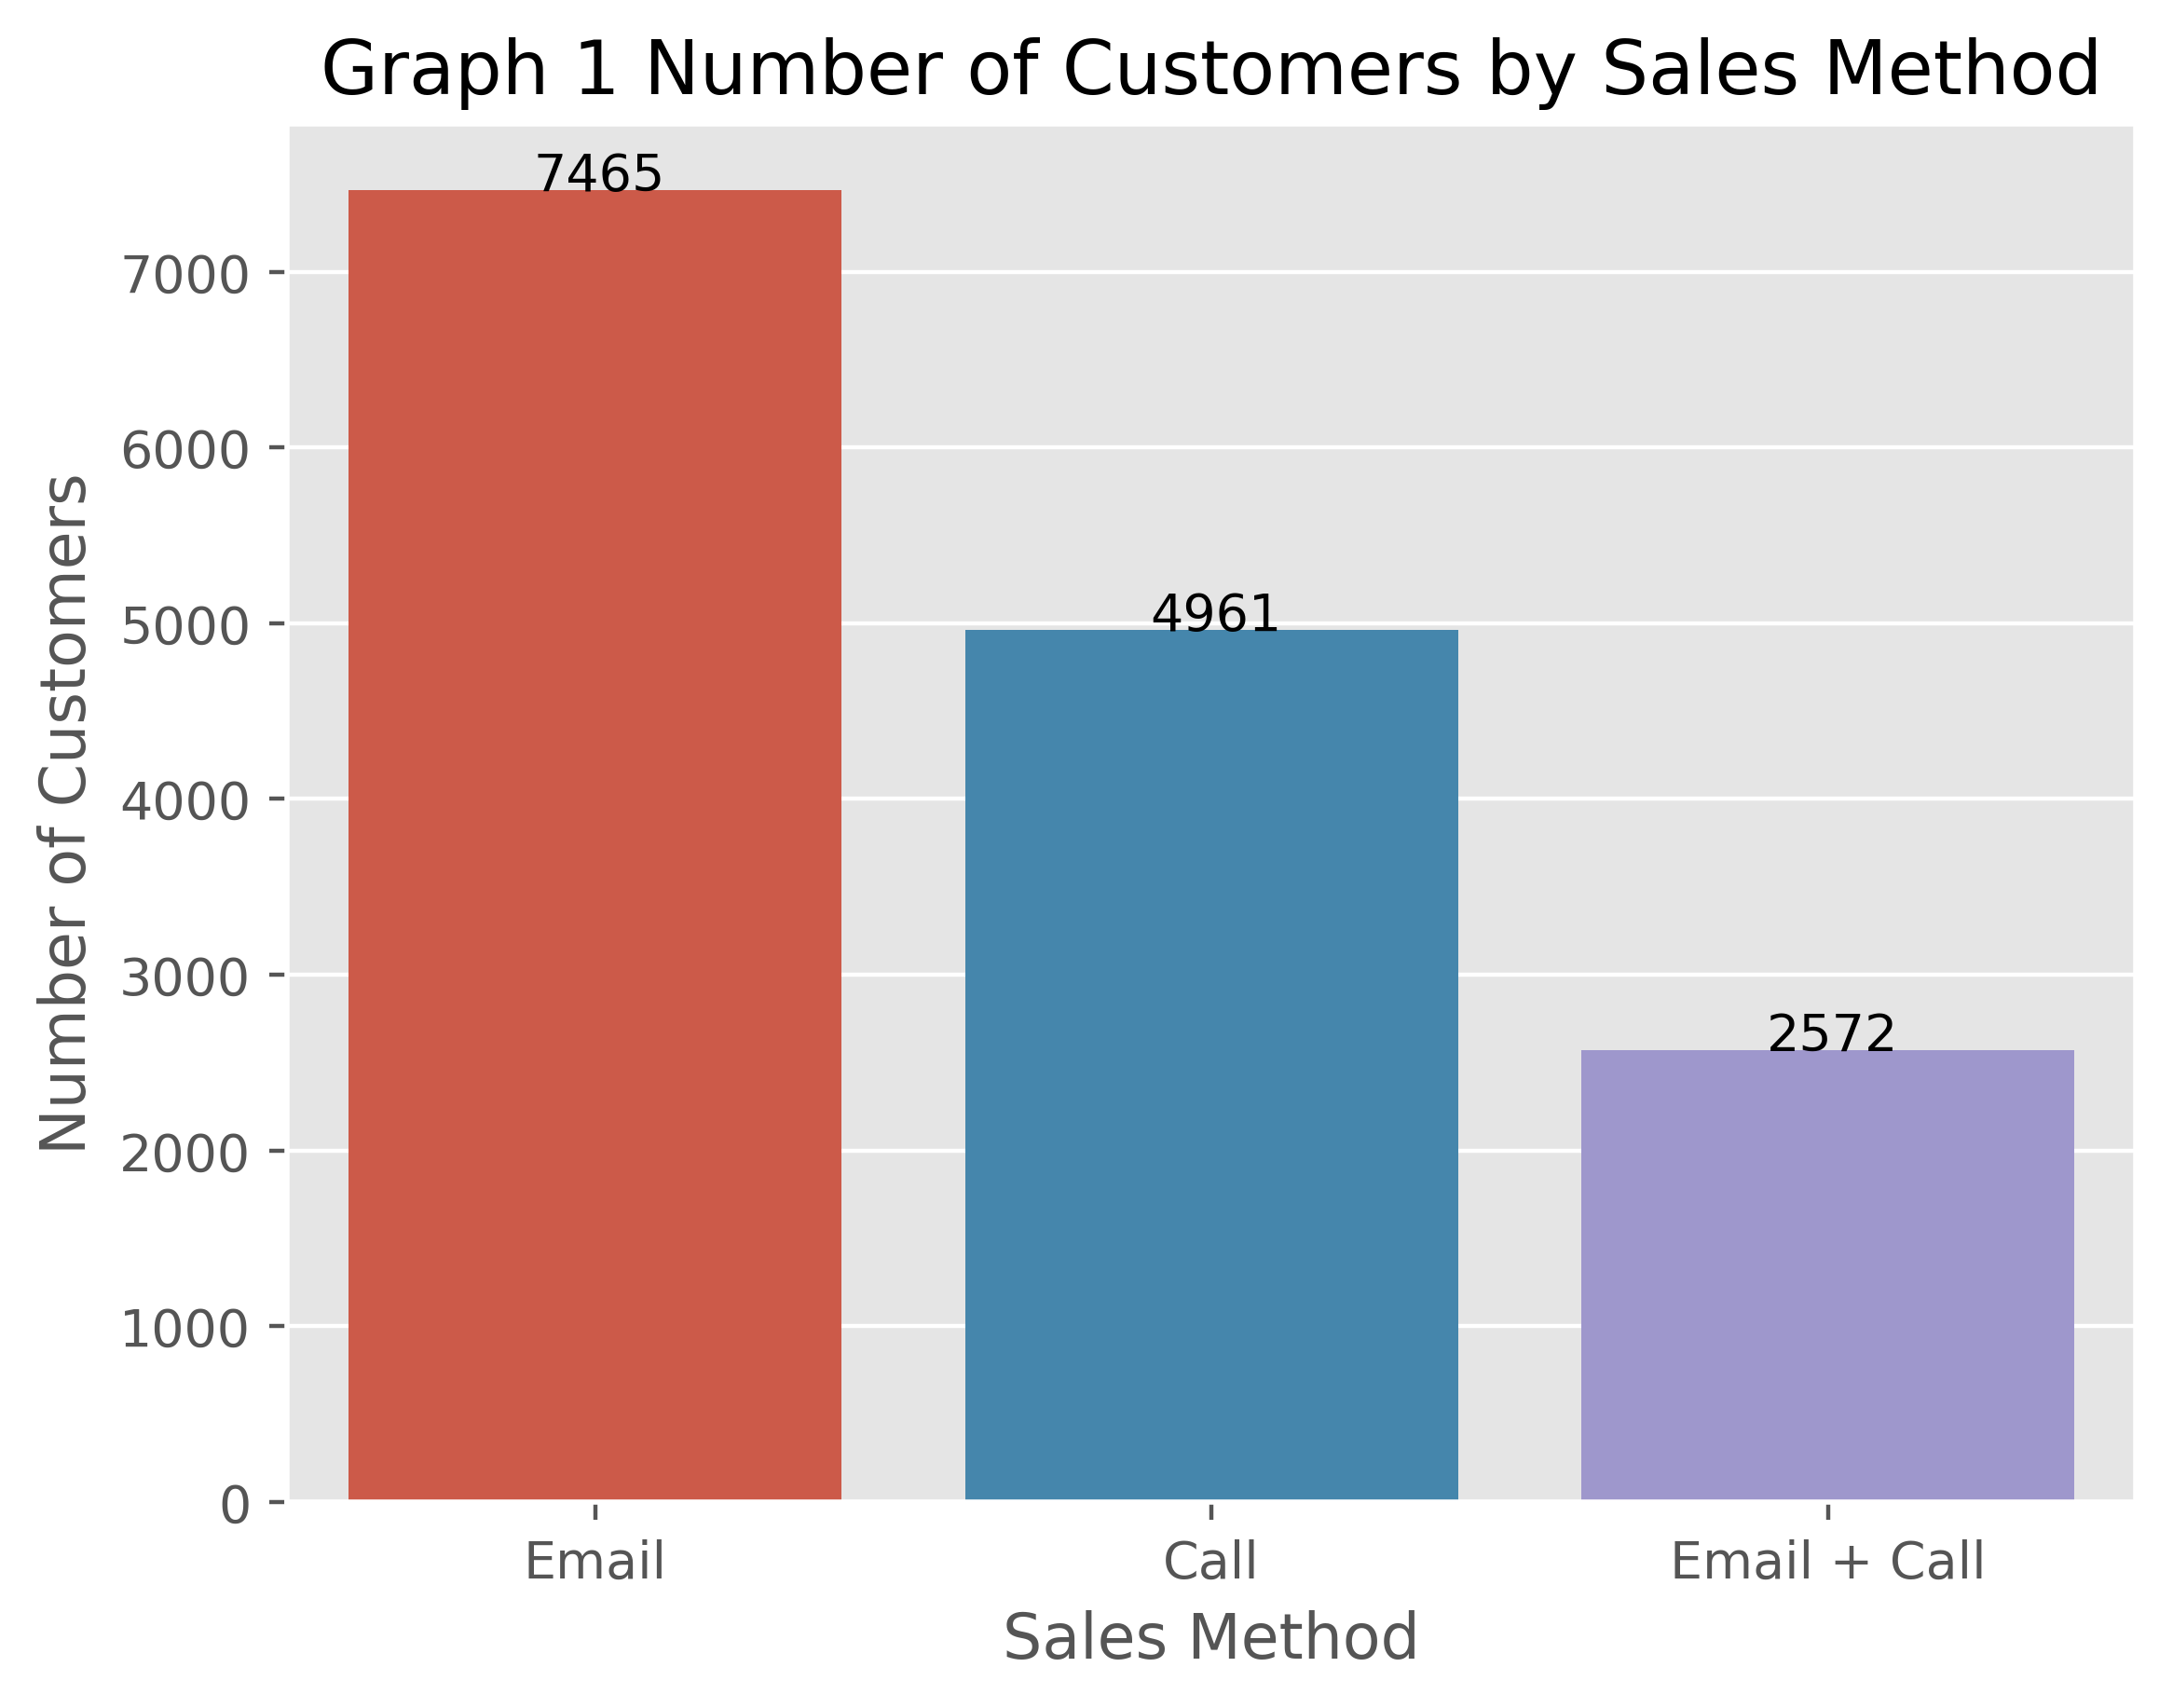

In [13]:
# setting up the style

plt.style.use('ggplot')
sns.countplot(x='sales_method', data= df, order= ['Email', 'Call', 'Email + Call'])
plt.title('Graph 1 Number of Customers by Sales Method')
plt.ylabel('Number of Customers')
annotations(df, 'sales_method')
plt.xlabel('Sales Method');

### How many customers in the data were approached with each sales method?

We can see from graph 1 that most customers come from the group approched by **Email**, followed by **Call** and lastly **Email + Call**. The number of customers in each group roughly follows a 3:2:1 ratio respectively.

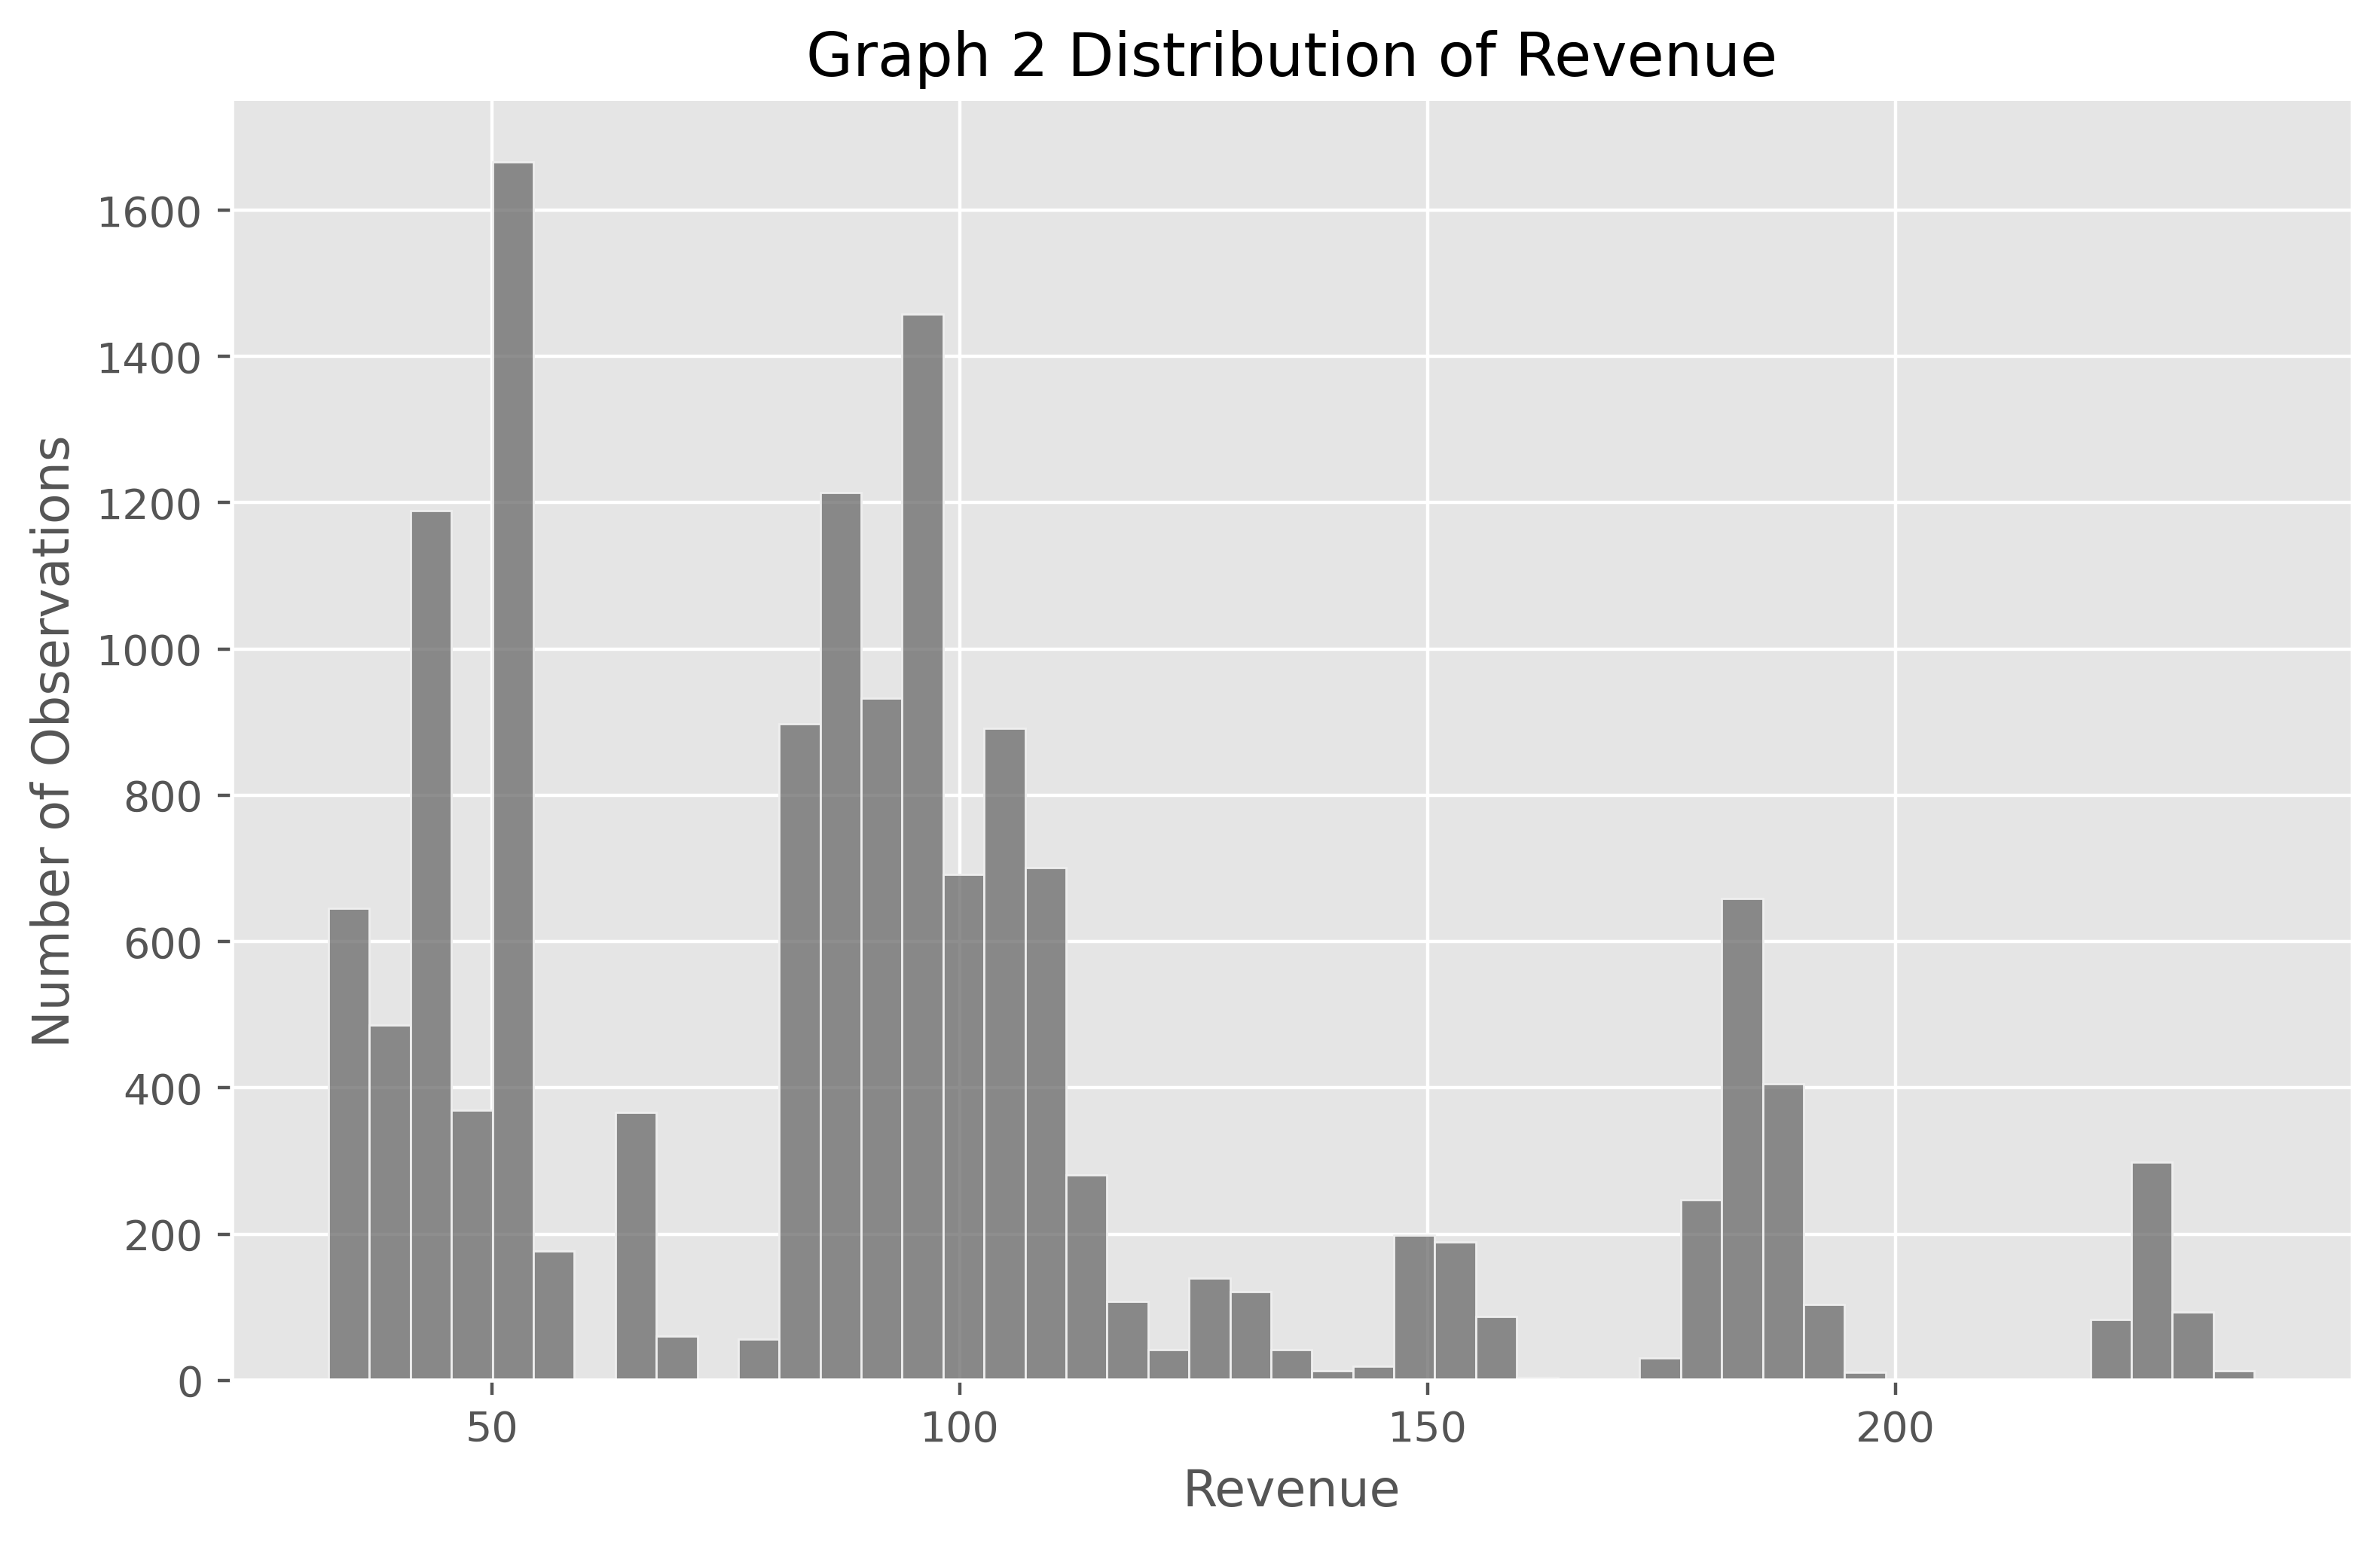

In [14]:
# visualizing the spread of revenue

sns.displot(x='revenue', data= df, color='dimgray',
            height= 5, aspect= 1.6)
plt.ylabel('Number of Observations')
plt.title('Graph 2 Distribution of Revenue')
plt.xlabel('Revenue');

### How does the distribution of revenue look overall?
Graph 2 shows how the distribution of revenue for all clients seems to have 2 main clusters of observations centered around 50 and 100 respectively and then a series of smaller groups with higher revenue values.


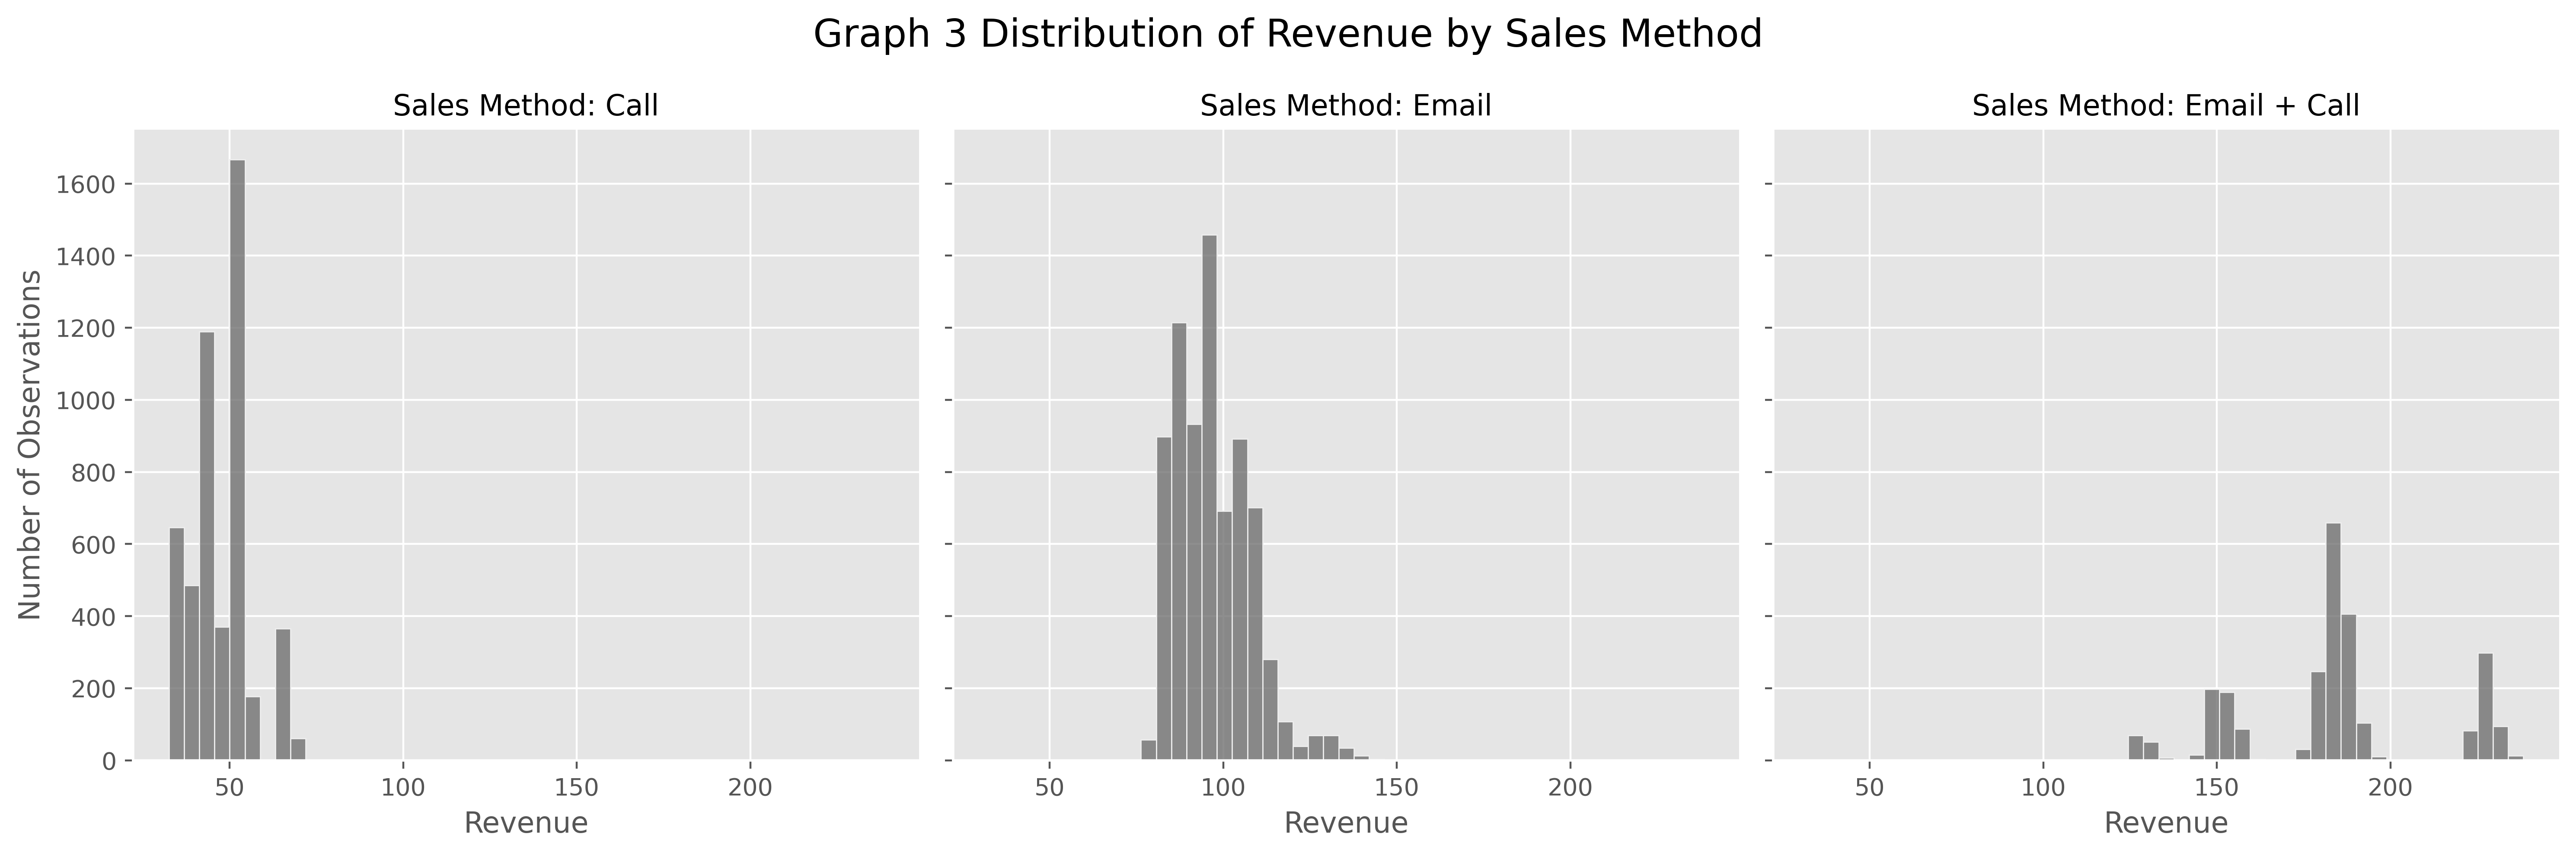

In [15]:
# revenue distribution by sales method

f = sns.displot(x='revenue', col='sales_method', data= df,
                col_order= ['Call', 'Email', 'Email + Call'],
                color='dimgray')
f.set_axis_labels('Revenue', 'Number of Observations')
f.set_titles(col_template='Sales Method: {col_name}')
f.fig.suptitle('Graph 3 Distribution of Revenue by Sales Method', fontsize= 16)
f.fig.subplots_adjust(top= .85);

Once we plot the distributions by sales method separetely we can observe where these clusters came from, graph 3 clearly shows how the sales method the clients were approached by seems to have an influence on the revenue generated from their sales.

We can see how the observations centered around 50 come from the **Call** method, the ones centered around 100 come from the **Email** method and the smaller groups on the higher end of the spectrum come from the clients in the **Email + Call** group.


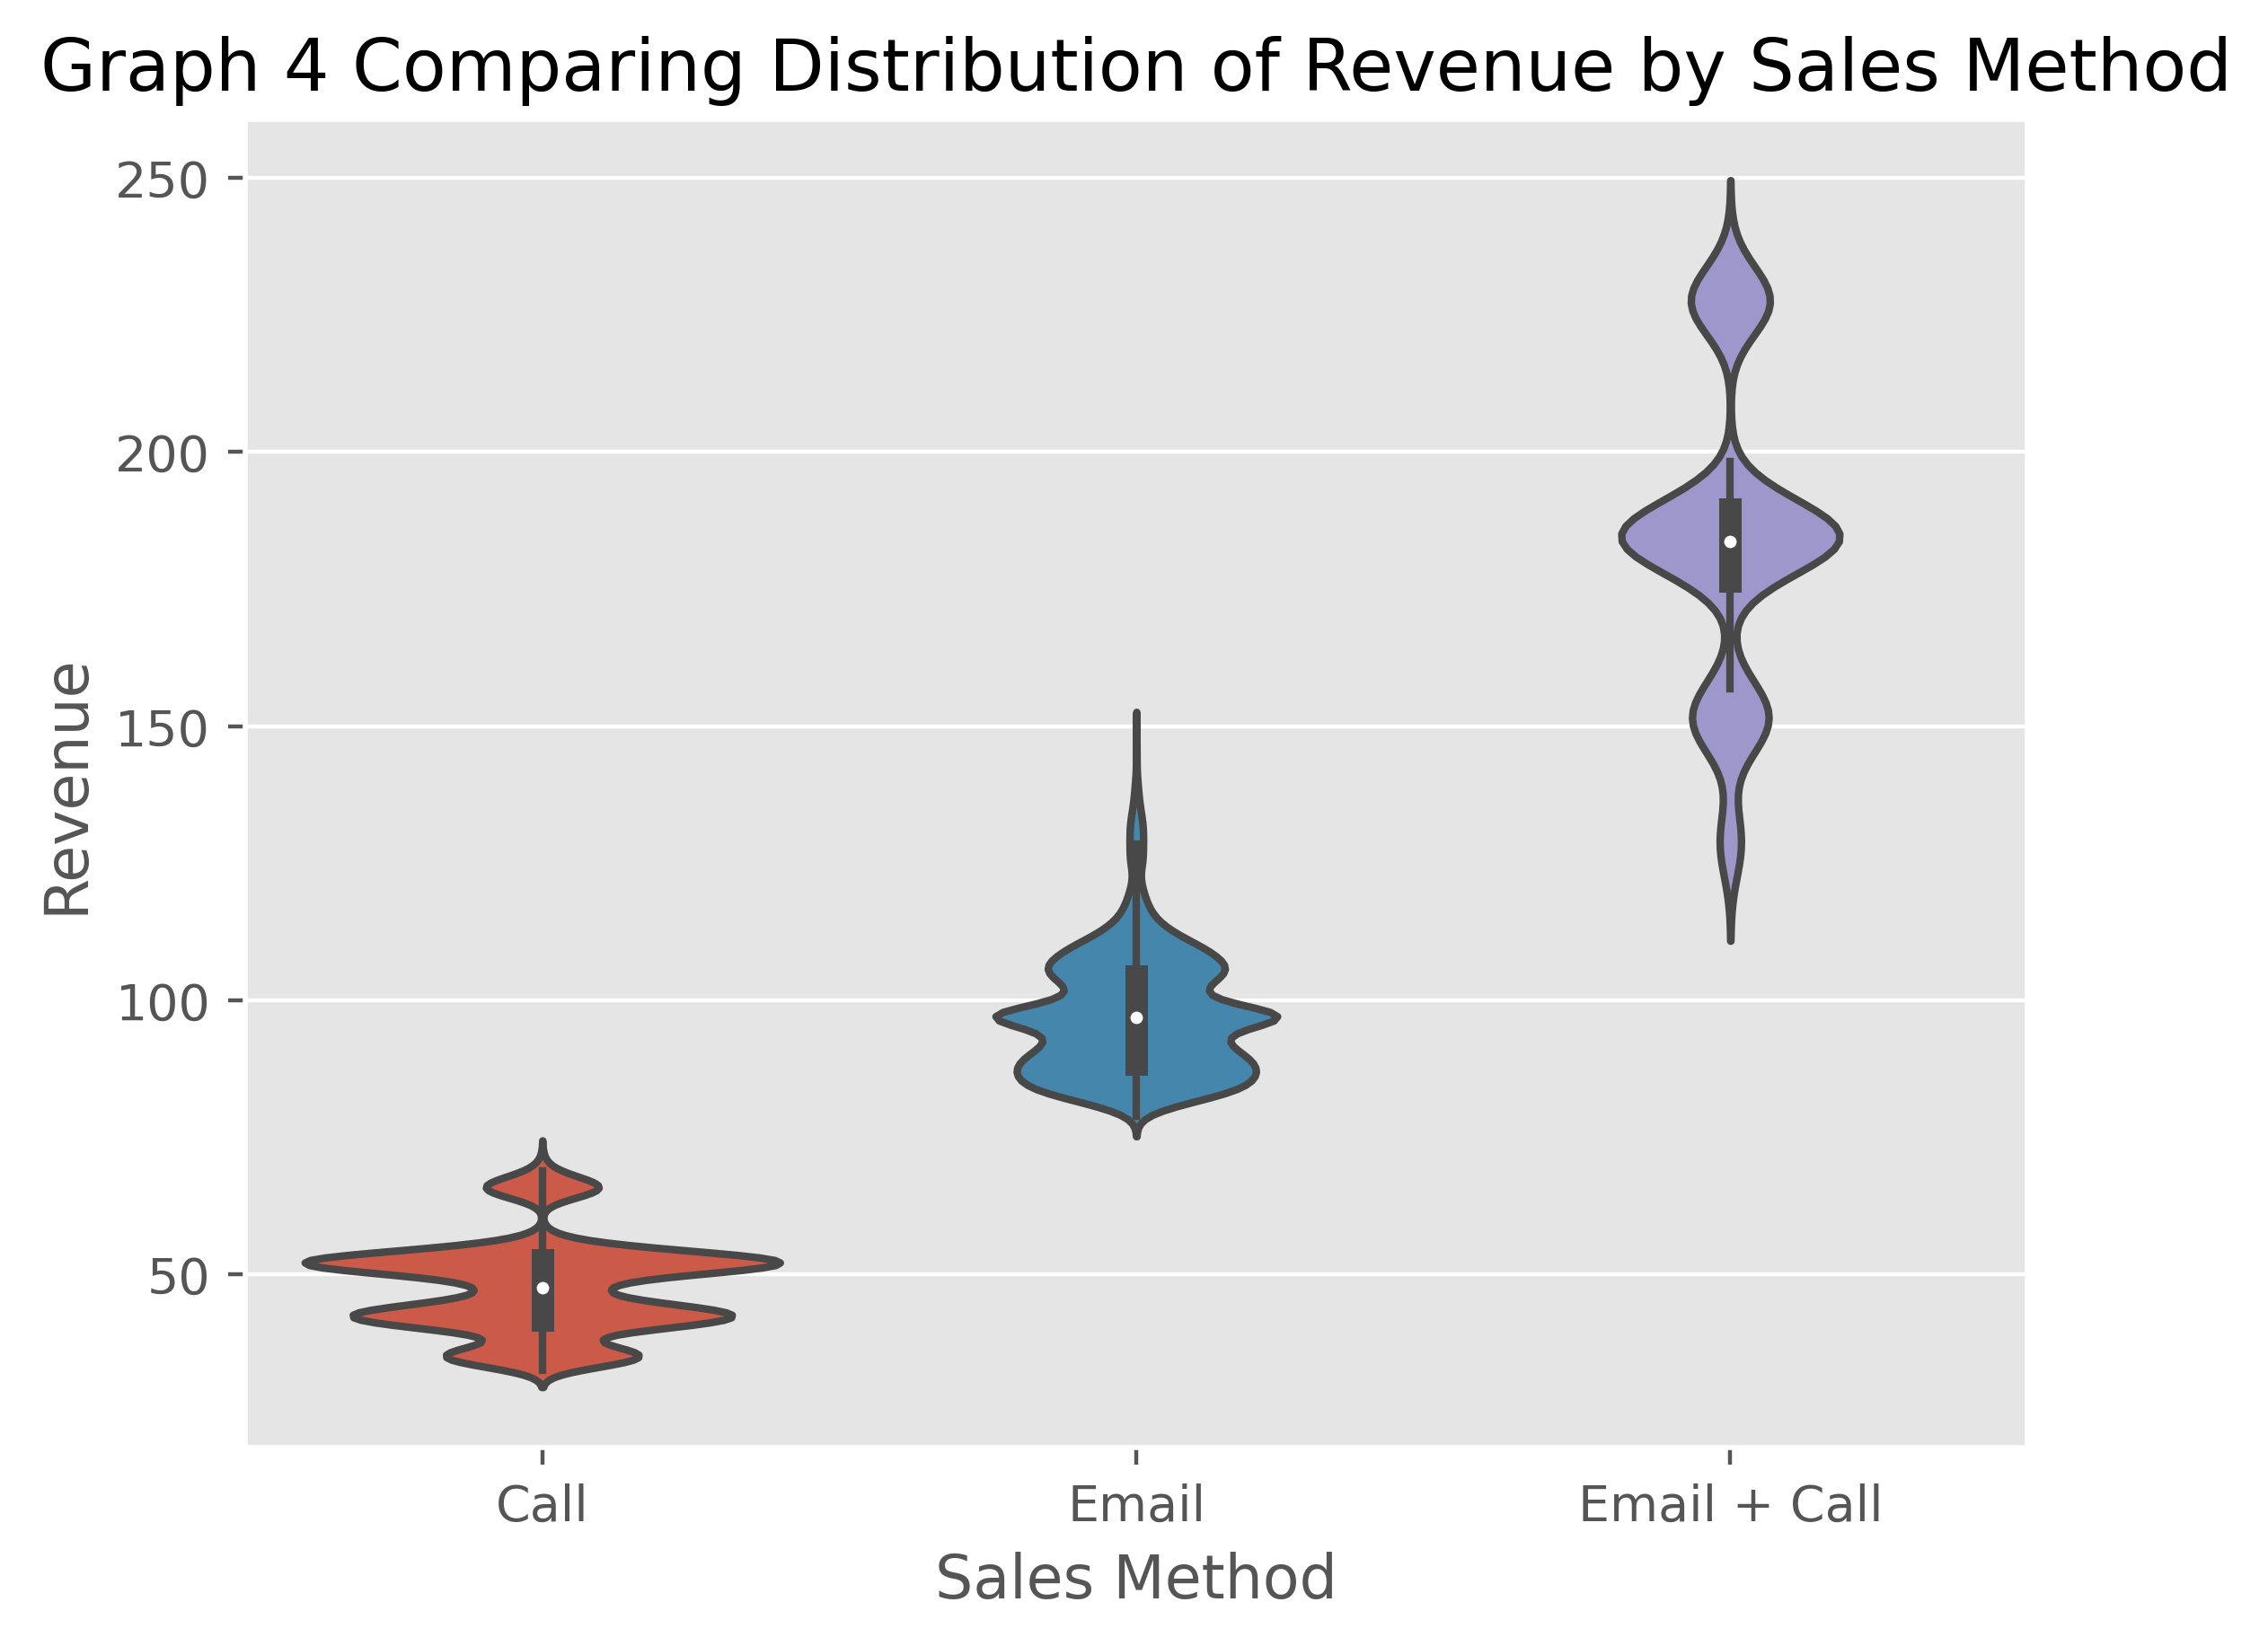

In [16]:
sns.violinplot(x='sales_method', y='revenue', data= df,
               order= ['Call', 'Email', 'Email + Call'])
plt.ylabel('Revenue')
plt.xlabel('Sales Method')
plt.title('Graph 4 Comparing Distribution of Revenue by Sales Method');

The graph above allows us to see how these distributions compare, here we can clearly see that each method led to a different median revenue value.

It can also be seen that the spread of the **Email + Call** method is the largest of the 3 groups.
From the graphs we have seen so far it starts to become apparent that customers approached by **Email + Call** generated more revenue on average followed by **Email** and lastly by **Call**. 

### Was there any difference in revenue over time for each of the methods?
Since the number of customers on each method is quite different it is important to also have a look at the total revenue generated by each group.

Graph 5 shows a stacked area chart on the left of the cumulative total revenue by week. 
In week 1 the percentage of total revenue generated by the customers from the **Email** group corresponded to roughly 84% of the total for that week, by the time we reached week 6 this value had dropped to 51% and the **Email + Call** group increased their share from an initial 6.8% to a 33% of the total revenue generated overall while they only represent just over 17% of the total customers.

The **Call** group also experienced a similar increase but not as large as the **Email + Call** method.

In [17]:
weeks = sorted(df.week.unique())
call = df[df['sales_method']=='Call'].groupby('week')['revenue'].sum().cumsum()
email = df[df['sales_method']=='Email'].groupby('week')['revenue'].sum().cumsum()
email_call = df[df['sales_method']=='Email + Call'].groupby('week')['revenue'].sum().cumsum()
method_dict = {'Email':email,'Email + Call':email_call,'Call':call}

# creating the palette

palette = {'Email':'tab:red','Email + Call':'tab:blue','Call':'tab:purple'}

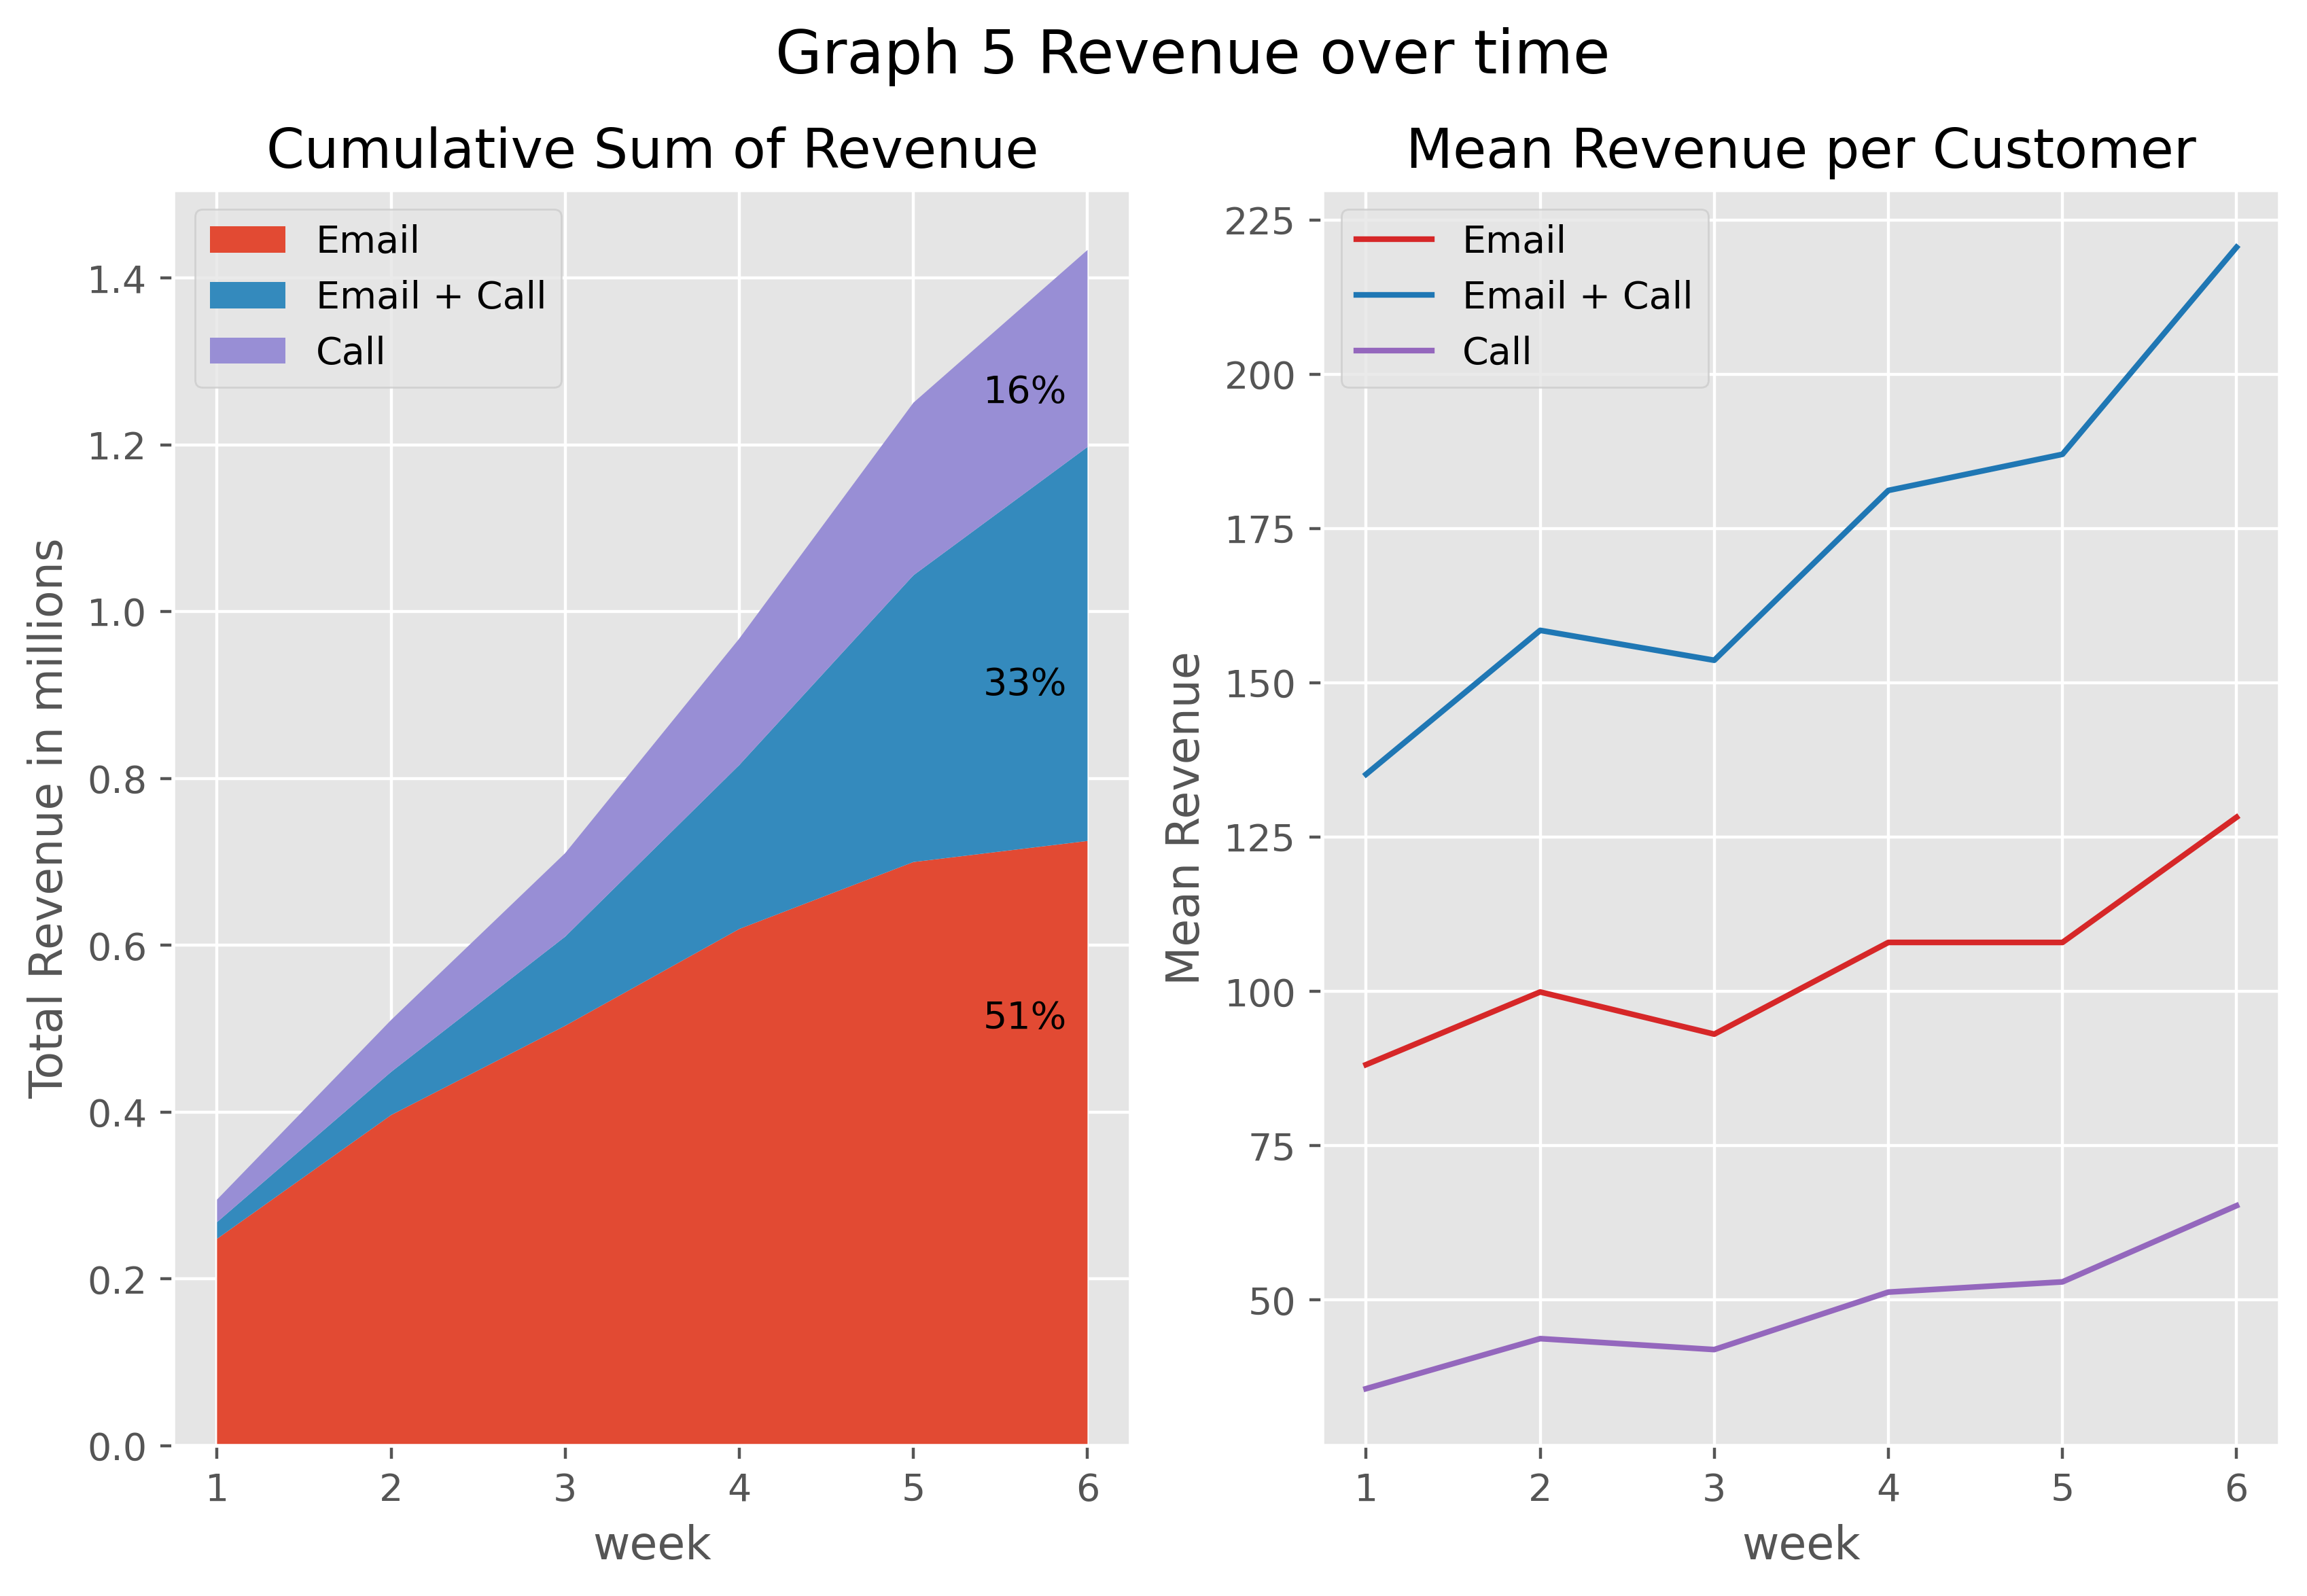

In [18]:
def formatter(x, pos):
    return str(round(x/1e6,1))

fig, ax = plt.subplots(1,2,figsize=(10,6))
sns.lineplot(x='week',y='revenue',data=df, estimator = 'mean', errorbar=None, hue ='sales_method',ax=ax[1],hue_order=['Email + Call','Email','Call'],palette=palette)
ax[1].set_ylabel('Mean Revenue')
ax[0].stackplot(weeks,method_dict.values(), labels= method_dict.keys())
ax[0].legend(loc='best', bbox_to_anchor =(0.325,0.9,0.1,0.1))
ax[0].set_ylabel('Total Revenue in millions')
ax[0].set_xlabel('week')
ax[0].set_title('Cumulative Sum of Revenue')
ax[1].set_title('Mean Revenue per Customer')
ax[0].annotate('33%', xy= (5.4,0.9*10**6))
ax[0].annotate('51%', xy= (5.4, 0.5*10**6))
ax[0].annotate('16%', xy= (5.4, 1.25*10**6))
ax[0].yaxis.set_major_formatter(formatter)
handles, labels = ax[1].get_legend_handles_labels()
order = [1,0,2]
ax[1].legend([handles[idx] for idx in order], [labels[idx] for idx in order])
fig.suptitle('Graph 5 Revenue over time', fontsize=16);

On the right of Graph 5 we have a line plot tracking the average revenue per customer for each sales method. From it we can see that there has been an upwards trend for all methods, the **Email + Call** method had the highest average value and also experienced the greatest absolute increase in average revenue which was 85 dollars going from 135 dollars to 220 dollars, followed by the **Email** method in both the average revenue and in the increase in average revenue over time which was of 40 dollars and coming last the **Call** group had the lowest average revenue values and the lowest increase in average revenue which was of $30.

### Differences in total sales from each method over time
Graph 6 below sheds some light as to why this is the case, as we can see while the sales coming from the **Email** group have a clear downwards trend over time, the **Email + Call** group experienced the opposite effect having a clear upwards trend other than for week 6 where we do see the sales drop.

The customers from the **Call** method also had a similar trend than the **Email + Call** group, however it was less steep and also had a higher drop in sales on week 6.

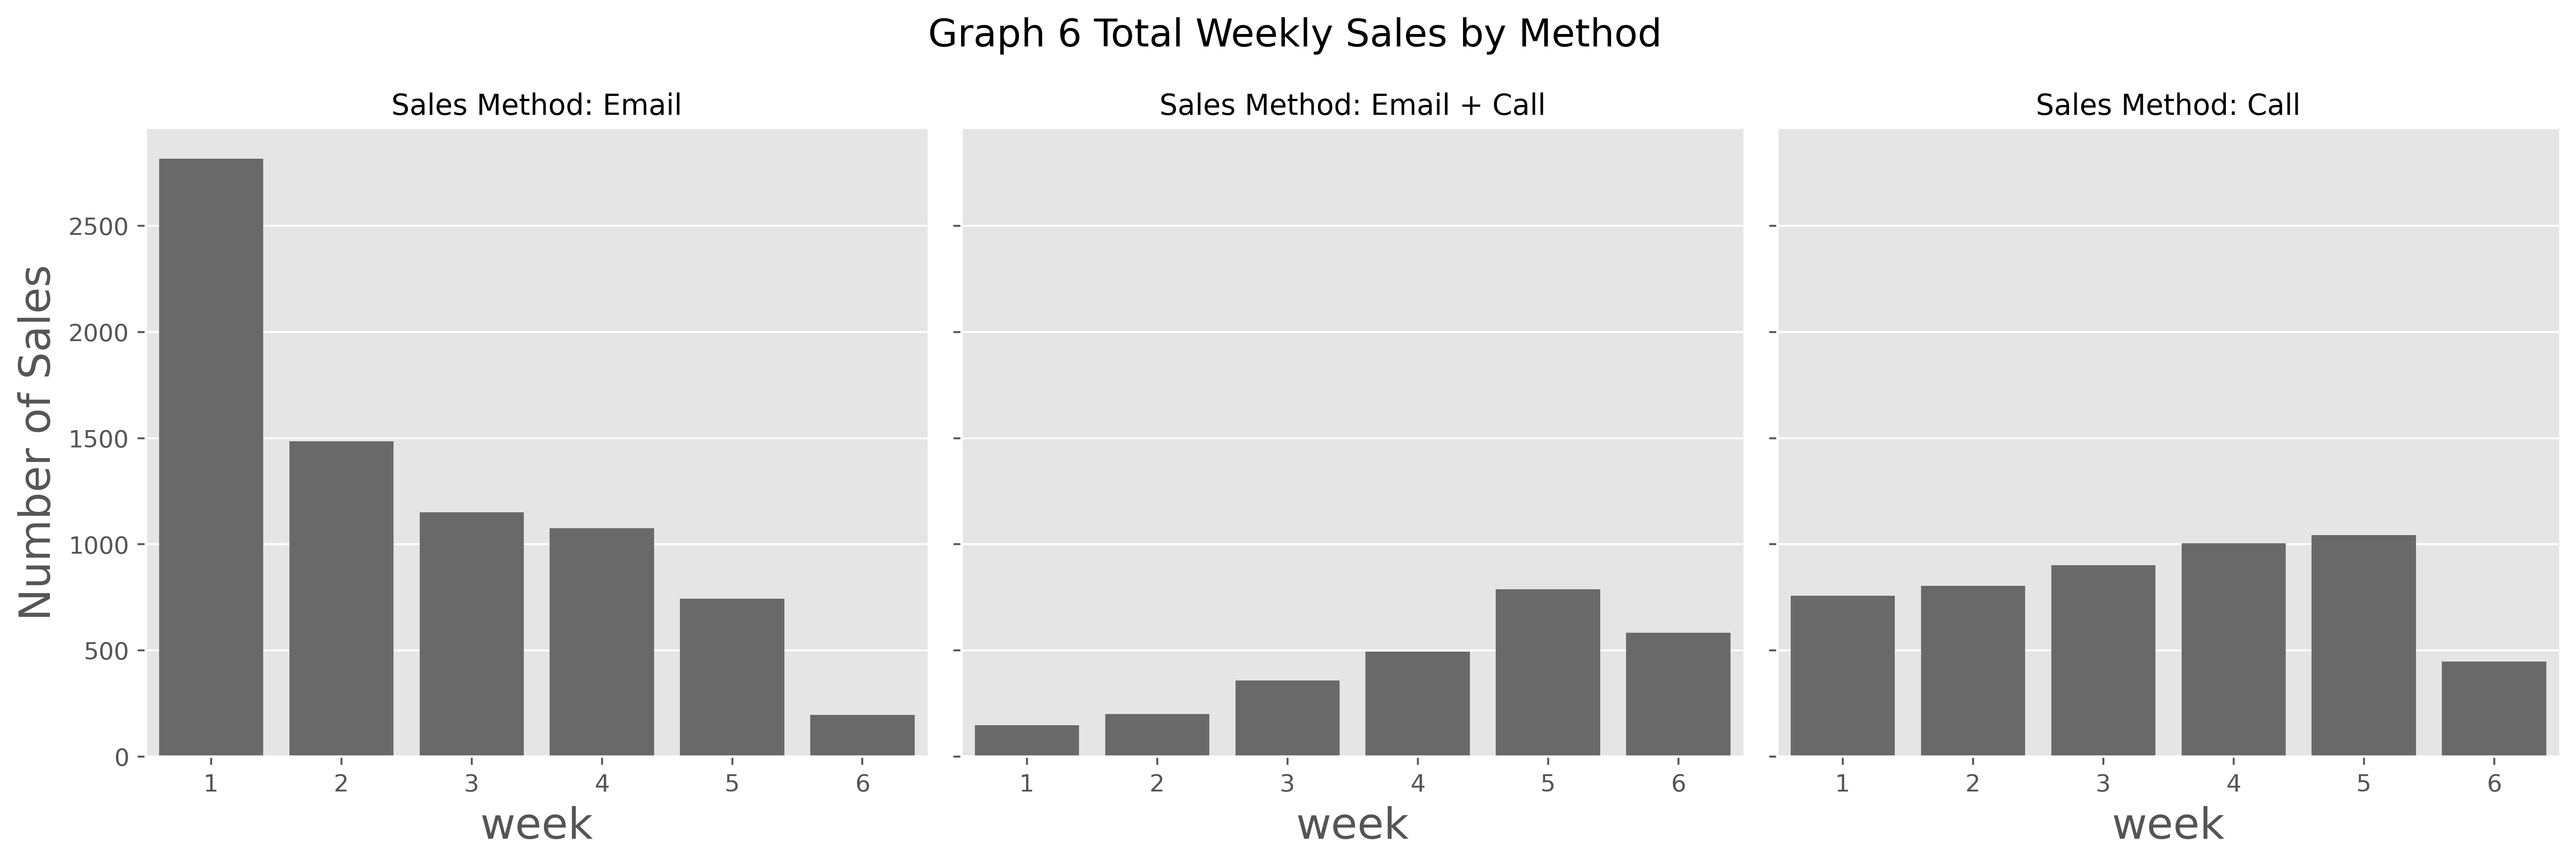

In [19]:
g = sns.catplot(x='week',col='sales_method',data=df,kind='count', color='dimgray')
g.set_axis_labels('week','Number of Sales', fontsize=18)
g.set_titles(col_template='Sales Method: {col_name}')
g.fig.suptitle('Graph 6 Total Weekly Sales by Method', fontsize=16)
g.fig.subplots_adjust(top=0.85)

### Summary of other differences found between the sales methods
There are a couple other differences to point out:
- The average number of products sold is again higher for the **Email + Call** method with 12.2 followed by the **Email** method with 9.7 and lastly the **Call** method with 9.5
- The average price per product sold ( calculated by dividing the revenue by the number of products) is also higher for the **Email + Call** group with 15, followed by **Email** with 10 and lastly **Call** with 5
- The average number of visits is higher amongst the customers from the **Email + Call** group with 26.8 followed by the **Email** method with 24.8 and closely behind the **Call** method with 24.4

Lastly I have tried to find differences across the groups in the number of years as customer and the states that most customers are based in for each method in order to check if there was any bias when placing customers on either group but the differences here were minimal.

## Business Metrics

Our goal is to maximize the total revenue generated while having an efficient use of the marketing and sales resources we have.

In order to measure this I would use total revenue generated over the total customers approached with each method. This will make sure that we take into account how effective the method is in engaging customers into purchasing products from the new line as well as how each method affects the revenue generated from the customers that make purchases.

Based on the data from the 6 weeks since the new product line was launched, as I have mentioned before the analysis I can only estimate this KPI based on total revenue generated divided by all customers that made purchases, doing so **Email + Call** performs best with a mean revenue of 183.65 per customer followed by **Email** with 97.13 and lastly **Calls** with 47.6

## Recommendations
For the following weeks these would be my recommendations:

- First of all to gather data on the total customers approached by each method in order to see that my estimates are valid.
- In an ideal world the **Email + Call** method by the revenue per customer numbers seems the perfect choice however I understand that it might consume more resources than the **Email** method but both of them have clearly shown better results than the **Call** method.
- If we do have to focus only on one method then based on the data the **Email + Call** method is the best approach.
- Otherwise continue to monitor revenue per customer approached in order to watch out for any changes in how customers react to each of those two methods, the number of sales over time is also of particular importance since the **Email** method so far has a clear downwards trend.
- Gather more data related to the type of product customers are buying to then try and see if clients buying a particular category of products respond better or worse to each method.